In [26]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plit
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
digits = load_digits()
x = digits.data
y = digits.target

In [4]:
x[0].shape

(64,)

In [5]:
x[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

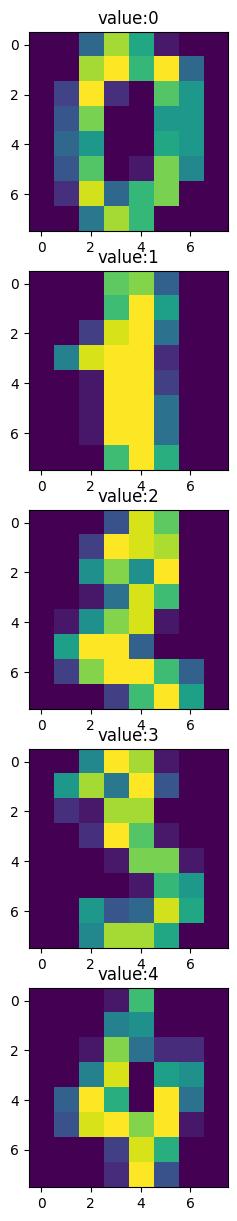

In [6]:
plt.figure(figsize=(10, 15))
for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.imshow(x[i].reshape(8,8))
    plt.title(f"value:{y[i]}")
plt.show()

In [7]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
x.shape

(1797, 64)

In [9]:
y.shape

(1797,)

In [10]:
len(x[0])

64

In [11]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,x_test.shape

((1437, 64), (360, 64), (1437,), (360, 64))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [19]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [20]:
y_pred = knn.predict(x_test)

In [21]:
first_ten_rows = x_test[:10]

In [22]:
knn.predict(first_ten_rows)

array([5, 2, 8, 1, 7, 2, 6, 2, 6, 5])

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [25]:
cm = confusion_matrix(y_test,y_pred)

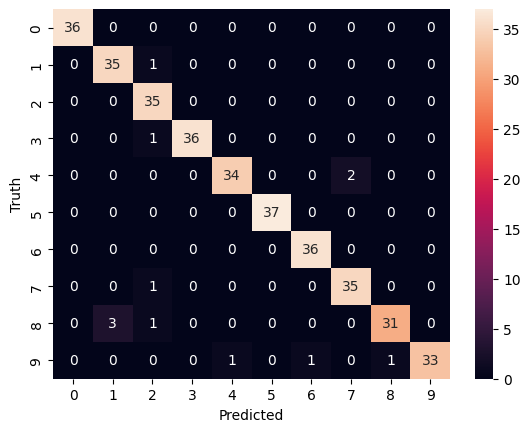

In [30]:
sns.heatmap(cm,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [32]:
KNN_M = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
KNN_M.fit(x_train, y_train)
y_pred = KNN_M.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.9833333333333333

In [34]:
cm = confusion_matrix(y_test,y_pred)

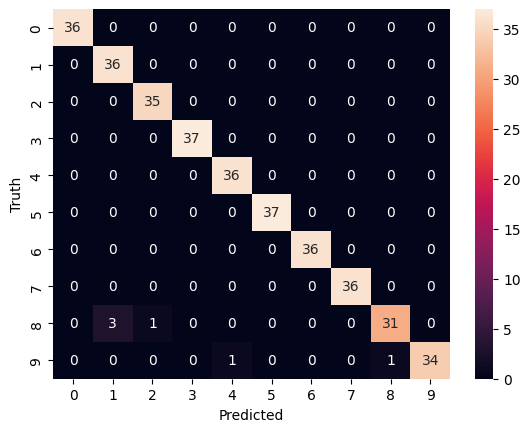

In [35]:
sns.heatmap(cm,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

In [39]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [40]:
cv_scores

[0.9756339527680989,
 0.9686653116531165,
 0.9721496322106077,
 0.9700638792102207,
 0.9756266937669377,
 0.9707534843205575,
 0.9700590398761129,
 0.9714479287650019,
 0.9672740030971738,
 0.9651858304297327,
 0.9637921022067364,
 0.9644889663182348,
 0.9582268679829655,
 0.9589261517615176,
 0.9589285714285716,
 0.9561435346496321,
 0.9519647696476964,
 0.9519647696476964,
 0.9533609175377469,
 0.9498790166473094]

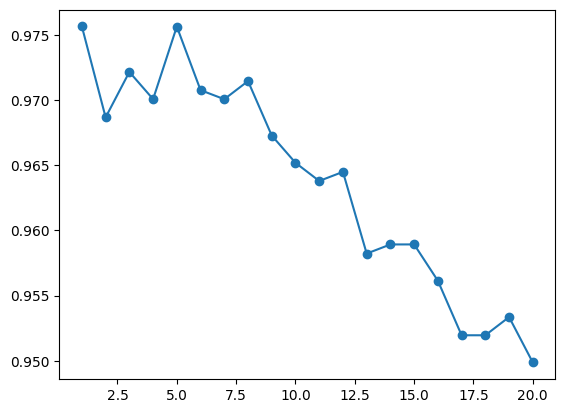

In [41]:
plt.plot(k_values, cv_scores, marker='o', linestyle='-')

In [42]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [44]:
cm = confusion_matrix(y_test,y_pred)

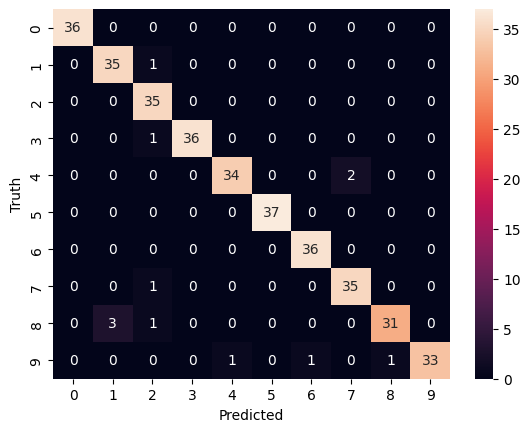

In [45]:
sns.heatmap(cm,annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.show()